In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [3]:
#loading the dataset of 'Leads.csv'
Lead = pd.read_csv('Leads.csv')

In [4]:
#print the info about leas dataset
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#print the top five rows of Lead dataset
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#check the percentage of data imbalance in the Lead dataset
Lead.Converted.value_counts(normalize = True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [7]:
#check for the unique values in 'Lead Profile'
Lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [8]:
#In the Lead dataset, select it means the customer has not choosen any option. It represents null values.
#Repalcing the 'select values to np.NaN' in Lead dataset
Lead.replace('Select',np.NaN, inplace = True)

In [9]:
#check for the unique values in 'Lead Profile' with conversion of select values to null 
Lead['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [10]:
#check for the percentage of Null values in Lead dataset
Lead.null = 100*(Lead.isna().sum()/len(Lead)).sort_values(ascending = False)

In [11]:
#print the null values percentgae
print(Lead.null)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [12]:
#Let's drop those columns whose null percentage is above 45%
columns = Lead.columns

for i in columns:
    if ((100*(Lead[i].isnull().sum()/len(Lead))) >= 45):
        Lead.drop(i, axis = 1, inplace = True)

In [13]:
#check for the percentage of Null values in Lead dataset
Lead.null = 100*(Lead.isna().sum()/len(Lead)).sort_values(ascending = False)
print(Lead.null)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [14]:
#check for the values in 'City' at lead dataset
Lead['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

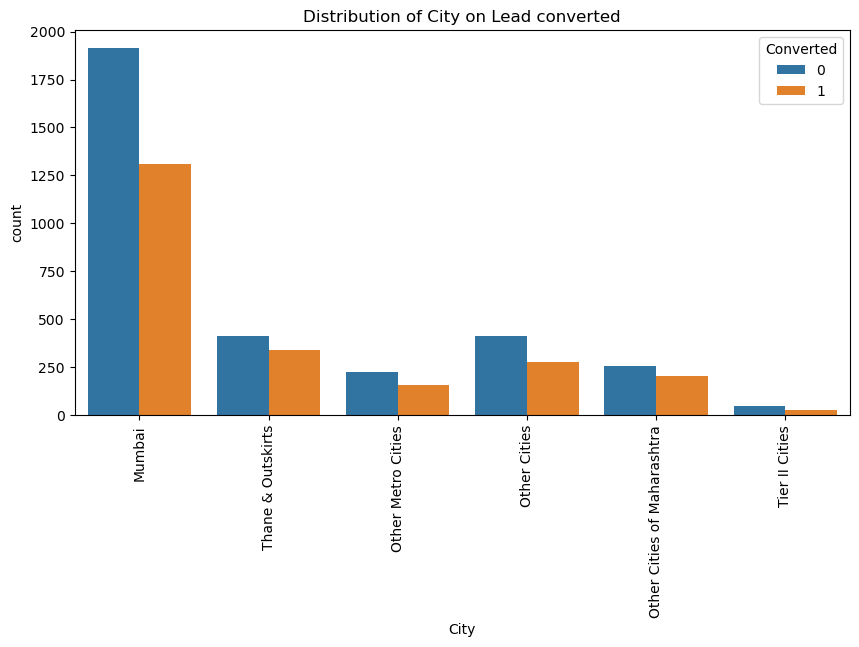

In [15]:
#plot countplot 
plt.figure(figsize=(10,5))
ax = sns.countplot( x='City', hue='Converted', data = Lead)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Distribution of City on Lead converted')
plt.show()

In [16]:
# replace the null values with mode
Lead['City'] = Lead['City'].replace(np.NaN,'Mumbai')

In [17]:
#check for the values in 'City' at lead dataset
Lead['City'].value_counts(dropna = False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
#check for the values in 'Specialization' at lead dataset
Lead['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
#Group all the managment specialization in one class
Lead['Specialization'] = Lead['Specialization'].replace(['Finance Management','Human Resource Management', 'Marketing Management', 'Operations Management', 'IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'], 'Managment Specialization')
Lead['Specialization'] = Lead['Specialization'].replace(['International Business','Rural and Agribusiness','E-Business'], 'Business Specilization')
Lead['Specialization'] = Lead['Specialization'].replace(np.NaN, 'Not Specified')

In [20]:
Lead['Specialization'].value_counts(dropna = False)

Managment Specialization             4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Business Specilization                308
Media and Advertising                 203
Travel and Tourism                    203
E-COMMERCE                            112
Services Excellence                    40
Name: Specialization, dtype: int64

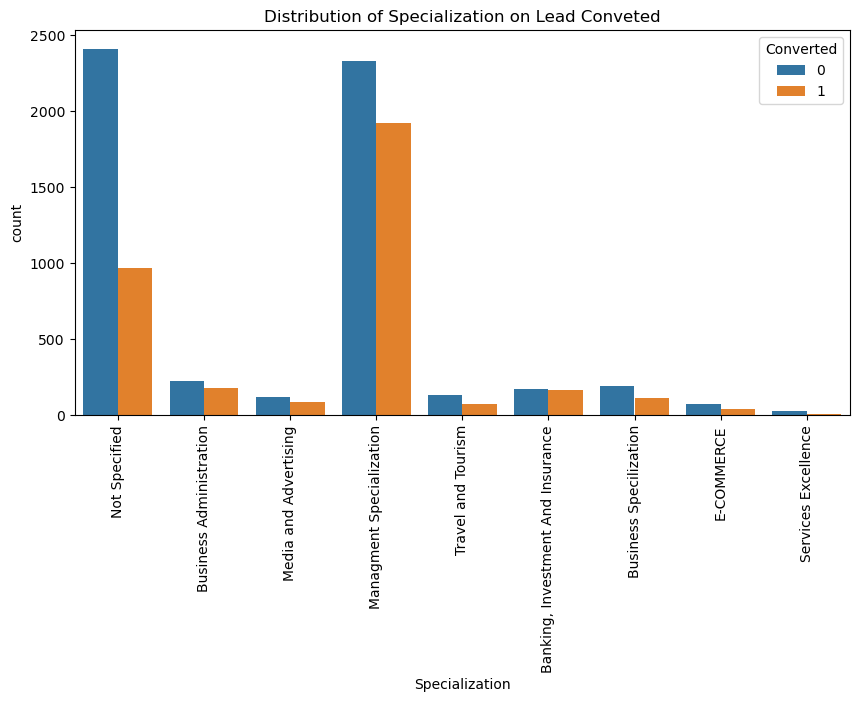

In [21]:
#plot countplot 
plt.figure(figsize=(10,5))
ax = sns.countplot( x='Specialization', hue='Converted', data = Lead)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Distribution of Specialization on Lead Conveted')
plt.show()

In [22]:
#check for the values in 'Tags' at lead dataset
Lead['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [23]:
Lead['Tags'] = Lead['Tags'].replace(np.NaN,'Others')
Lead['Tags'] = Lead['Tags'].replace(['Interested in other courses','Already a student','Closed by Horizzon','switched off','Busy','Lost to EINS','Not doing further education','Interested  in full time MBA','Graduation in progress','invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'], 'Others')

In [24]:
Lead['Tags'].value_counts(dropna = False)

Others                                 5965
Will revert after reading the email    2072
Ringing                                1203
Name: Tags, dtype: int64

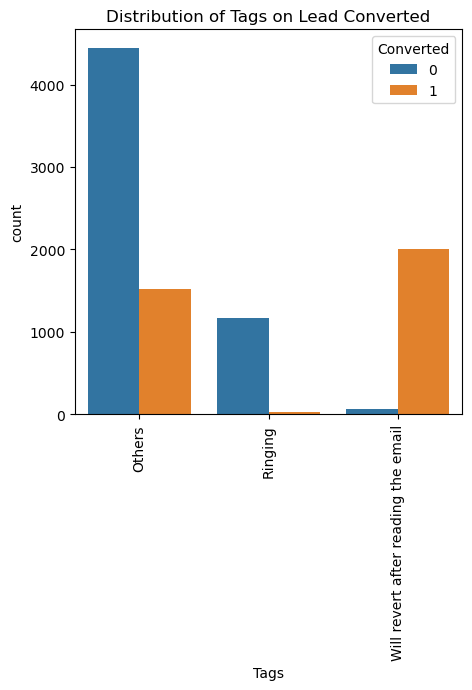

In [25]:
#plot countplot 
plt.figure(figsize= (5,5))
ax = sns.countplot( x='Tags', hue='Converted', data = Lead)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Distribution of Tags on Lead Converted')
plt.show()

In [26]:
#check for the values in 'What matters most to you in choosing a course' at lead dataset
Lead['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

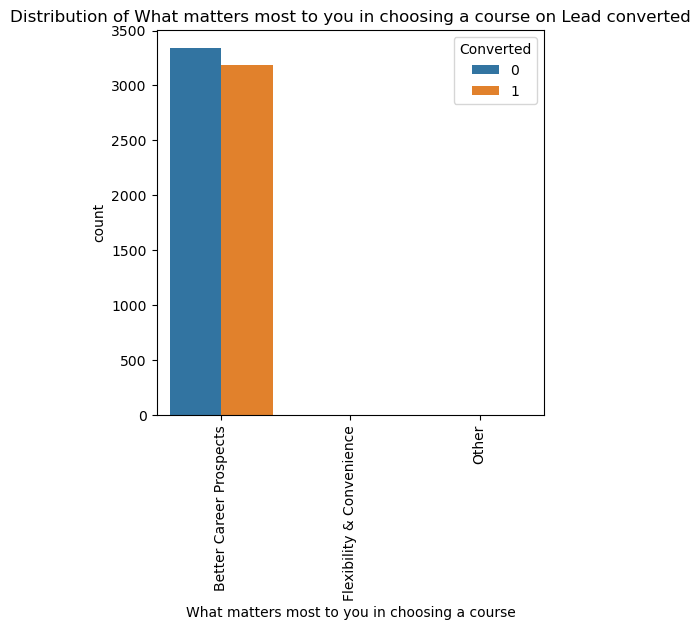

In [27]:
#plot countplot 
plt.figure(figsize=(5,5))
ax = sns.countplot( x='What matters most to you in choosing a course', hue='Converted', data = Lead)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Distribution of What matters most to you in choosing a course on Lead converted')
plt.show()

In [28]:
#let's drop What matters most to you in choosing a course variable as max choosen Better Career Prospects
Lead.drop('What matters most to you in choosing a course', axis=1, inplace = True)

In [29]:
#check for the values in 'What is your current occupation' at lead dataset
Lead['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
Lead['What is your current occupation'] = Lead['What is your current occupation'].replace(np.NaN, 'Other')
Lead['What is your current occupation'] = Lead['What is your current occupation'].replace(['Student','Housewife','Businessman'], 'Other')

In [31]:
Lead['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
Other                   2934
Working Professional     706
Name: What is your current occupation, dtype: int64

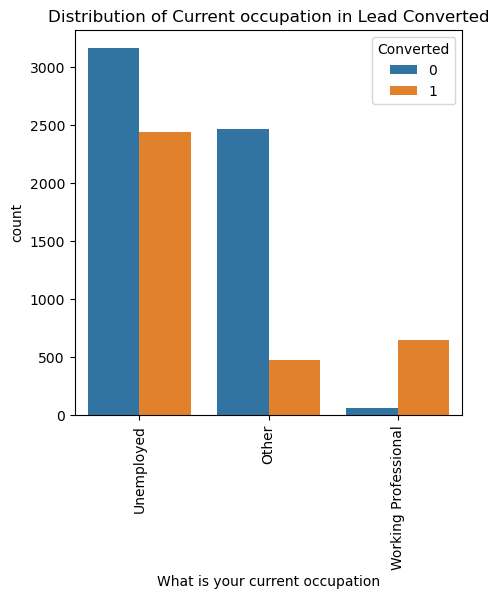

In [32]:
#plot countplot 
plt.figure(figsize=(5,5))
ax = sns.countplot( x='What is your current occupation', hue='Converted', data = Lead)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Distribution of Current occupation in Lead Converted')
plt.show()

In [33]:
#check for the values in 'Country' at lead dataset
Lead['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

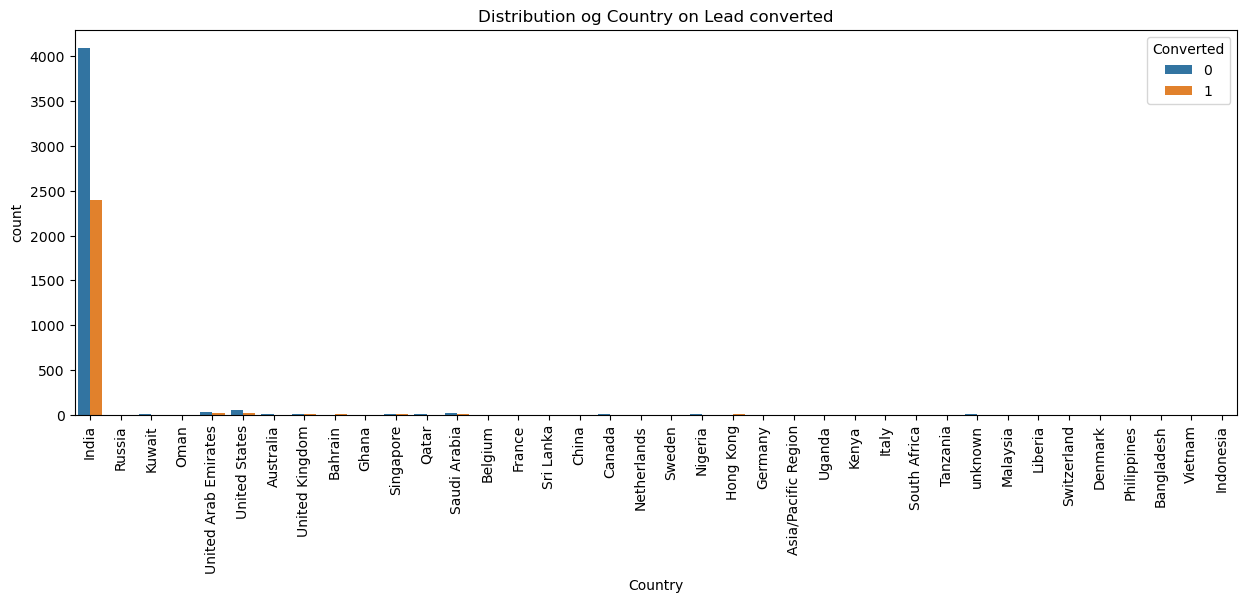

In [34]:
#plot countplot 
plt.figure(figsize=(15,5))
ax = sns.countplot( x='Country', hue='Converted', data = Lead)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Distribution og Country on Lead converted')
plt.show()

In [35]:
#let's drop country variable as max from india
Lead.drop('Country', axis=1, inplace = True)

In [36]:
#check for the values in 'Page Views Per Visit' at lead dataset
Lead['Page Views Per Visit'].value_counts(dropna = False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [37]:
Lead.dropna(subset = ['Page Views Per Visit'], inplace = True)

In [38]:
#check for the values in 'TotalVisits' at lead dataset
Lead['TotalVisits'].value_counts(dropna = False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [39]:
Lead.dropna(subset =['TotalVisits'], inplace = True)

In [40]:
#check for the values in 'TotalVisits' at lead dataset
Lead['TotalVisits'].value_counts(dropna = False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [41]:
#check for the values in 'Last Activity' at lead dataset
Lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [42]:
Lead['Last Activity'].replace(np.NaN,'Others')
Lead['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'], 'Others')

0       Page Visited on Website
1                  Email Opened
2                  Email Opened
3                        Others
4             Converted to Lead
                 ...           
9235                     Others
9236                   SMS Sent
9237                   SMS Sent
9238                   SMS Sent
9239                   SMS Sent
Name: Last Activity, Length: 9103, dtype: object

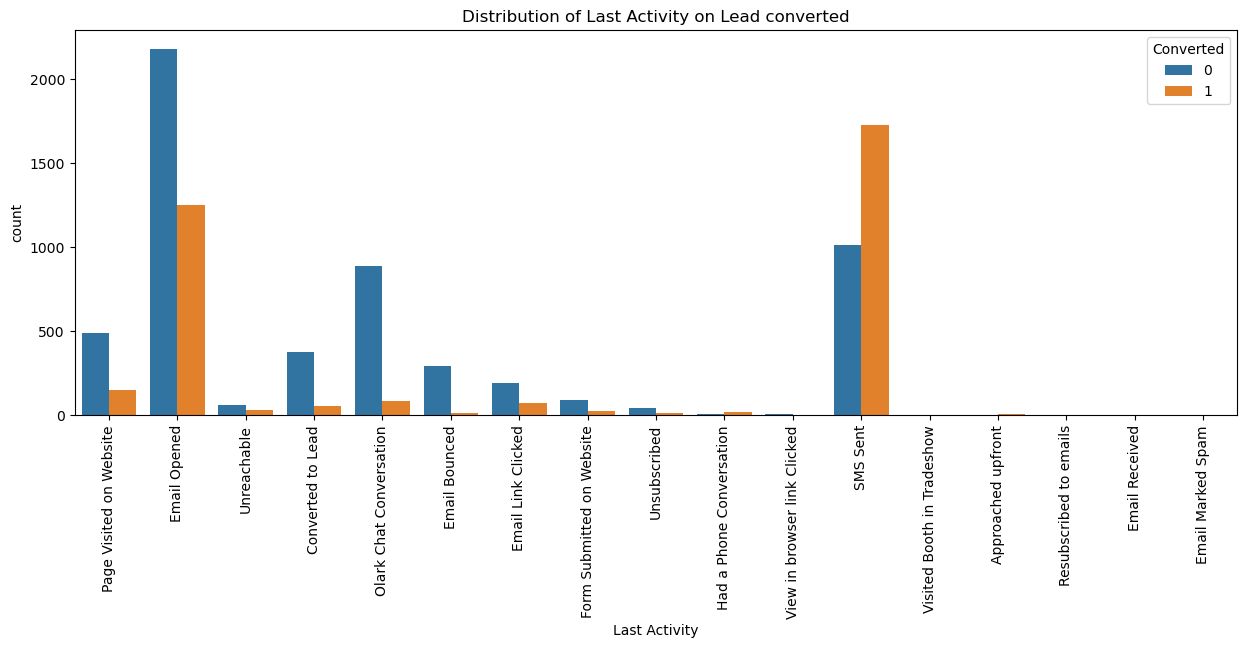

In [43]:
#plot countplot 
plt.figure(figsize=(15,5))
ax = sns.countplot( x='Last Activity', hue='Converted', data = Lead)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Distribution of Last Activity on Lead converted')
plt.show()

In [44]:
#check for the values in 'Lead Source' at lead dataset
Lead['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
NaN                    29
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [45]:
Lead['Lead Source'] = Lead['Lead Source'].replace(np.NaN,'Others')

In [46]:
Lead['Lead Source'] = Lead['Lead Source'].replace('google','Google')
Lead['Lead Source'] = Lead['Lead Source'].replace('Facebook','Social Media')
Lead['Lead Source'] = Lead['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Others')

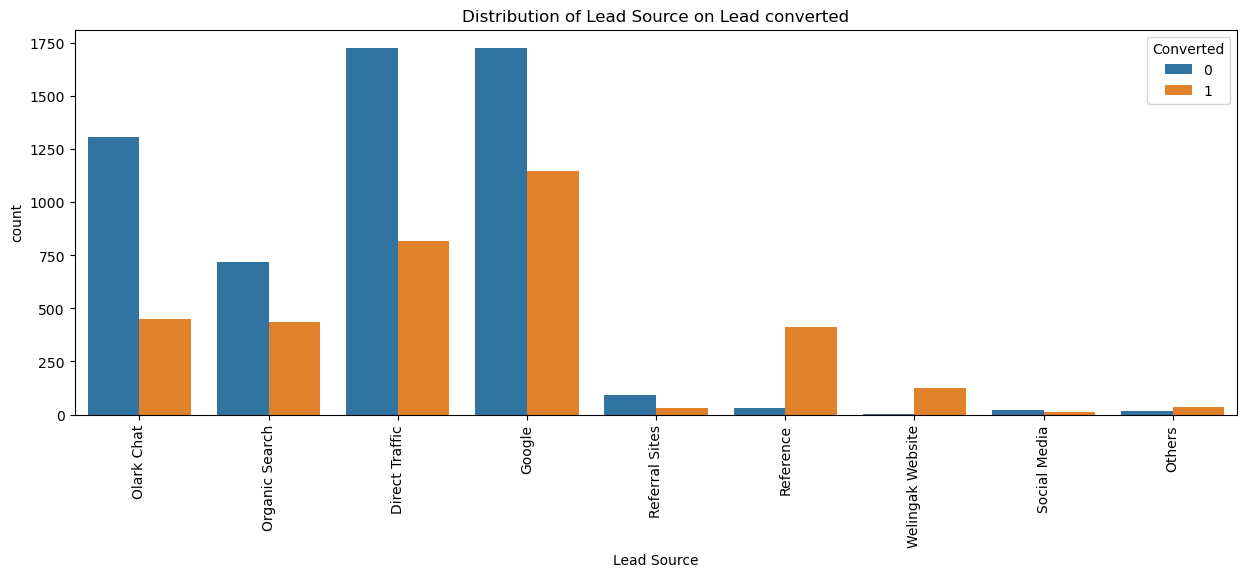

In [47]:
#plot countplot 
plt.figure(figsize=(15,5))
ax = sns.countplot( x='Lead Source', hue='Converted', data = Lead)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Distribution of Lead Source on Lead converted')
plt.show()

In [48]:
#check for the percentage of Null values in Lead dataset
Lead.null = 100*(Lead.isna().sum()/len(Lead)).sort_values(ascending = False)
print(Lead.null)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

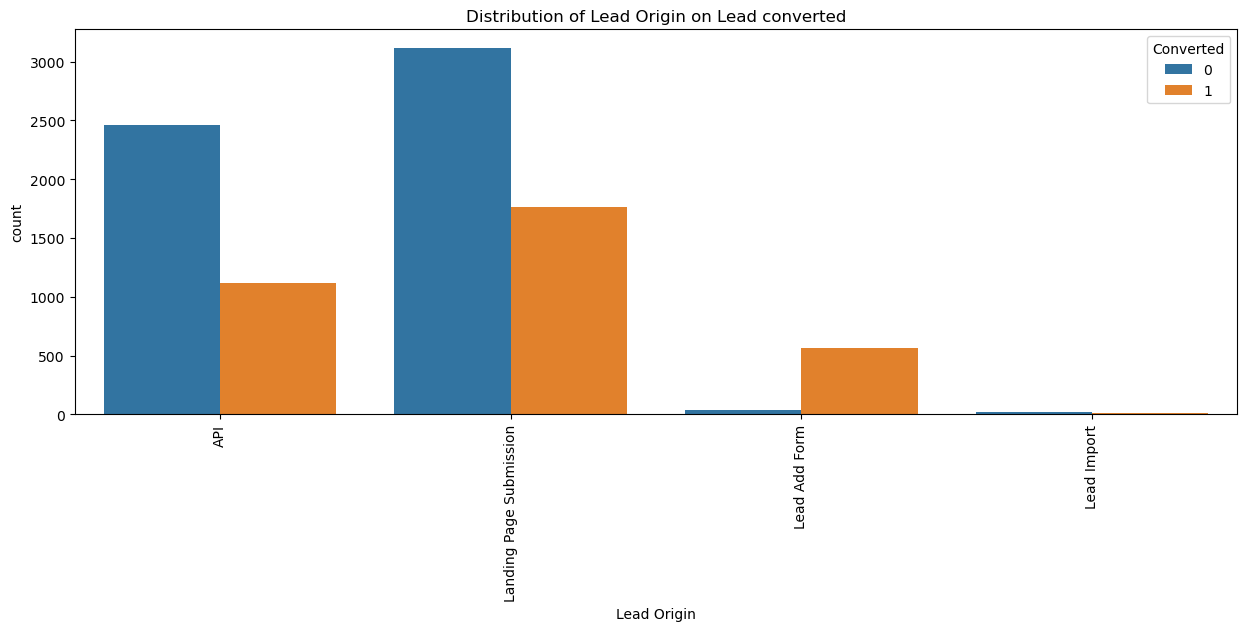

In [49]:
#plot countplot 
plt.figure(figsize=(15,5))
ax = sns.countplot( x='Lead Origin', hue='Converted', data = Lead)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Distribution of Lead Origin on Lead converted')
plt.show()

In [50]:
Lead['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [51]:
Lead['Last Notable Activity'] = Lead['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'],'Others')

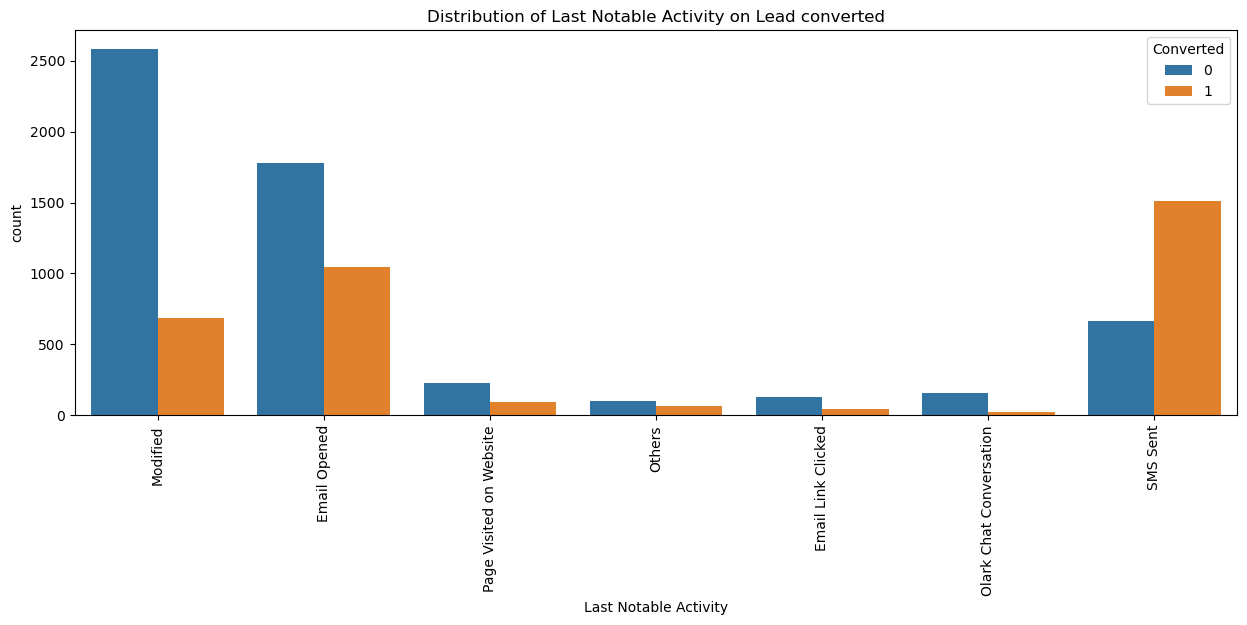

In [52]:
#plot countplot 
plt.figure(figsize=(15,5))
ax = sns.countplot( x='Last Notable Activity', hue='Converted', data = Lead)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Distribution of Last Notable Activity on Lead converted')
plt.show()

In [53]:
categorical_var = (['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call','Do Not Email'])

In [54]:
for i in categorical_var:
    print(i)
    print(Lead[i].value_counts())
    print('-'*20)

Search
No     9089
Yes      14
Name: Search, dtype: int64
--------------------
Magazine
No    9103
Name: Magazine, dtype: int64
--------------------
Newspaper Article
No     9101
Yes       2
Name: Newspaper Article, dtype: int64
--------------------
X Education Forums
No     9102
Yes       1
Name: X Education Forums, dtype: int64
--------------------
Newspaper
No     9102
Yes       1
Name: Newspaper, dtype: int64
--------------------
Digital Advertisement
No     9099
Yes       4
Name: Digital Advertisement, dtype: int64
--------------------
Through Recommendations
No     9096
Yes       7
Name: Through Recommendations, dtype: int64
--------------------
Receive More Updates About Our Courses
No    9103
Name: Receive More Updates About Our Courses, dtype: int64
--------------------
Update me on Supply Chain Content
No    9103
Name: Update me on Supply Chain Content, dtype: int64
--------------------
Get updates on DM Content
No    9103
Name: Get updates on DM Content, dtype: int64
-------

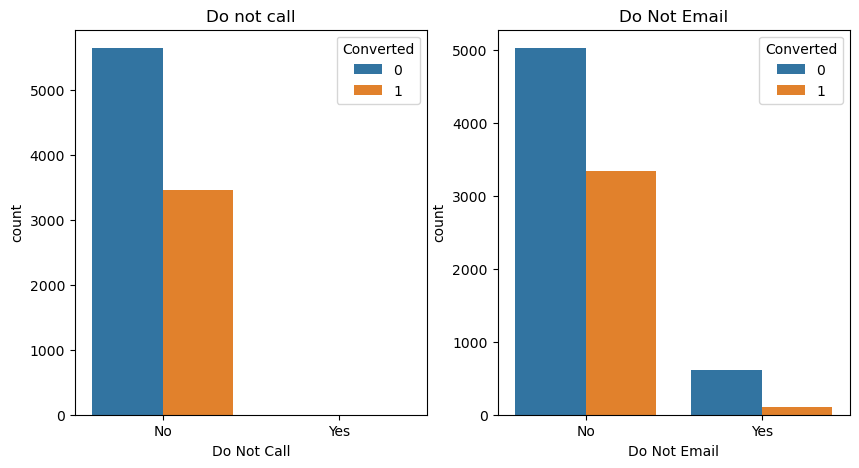

In [55]:
plt.figure(figsize=(10,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(x=Lead['Do Not Call'], hue=Lead['Converted'])
plt.title("Do not call")

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x=Lead['Do Not Email'], hue=Lead['Converted'])
plt.title("Do Not Email")
plt.show()

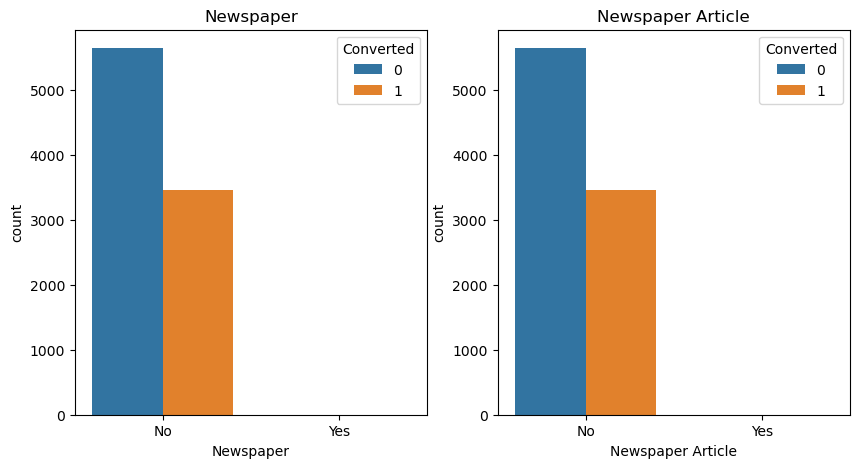

In [56]:
plt.figure(figsize=(10,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(x=Lead['Newspaper'], hue=Lead['Converted'])
plt.title("Newspaper")

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x=Lead['Newspaper Article'], hue=Lead['Converted'])
plt.title("Newspaper Article")
plt.show()

In [57]:
#Droping of the catergorical_variables
Lead.drop(categorical_var, axis = 1, inplace = True)

In [58]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   obje

In [59]:
categ_col = Lead.select_dtypes(include = 'object').columns.tolist()
Numer_col = Lead.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print(categ_col)
print('-'*30)
print(Numer_col)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']
------------------------------
['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


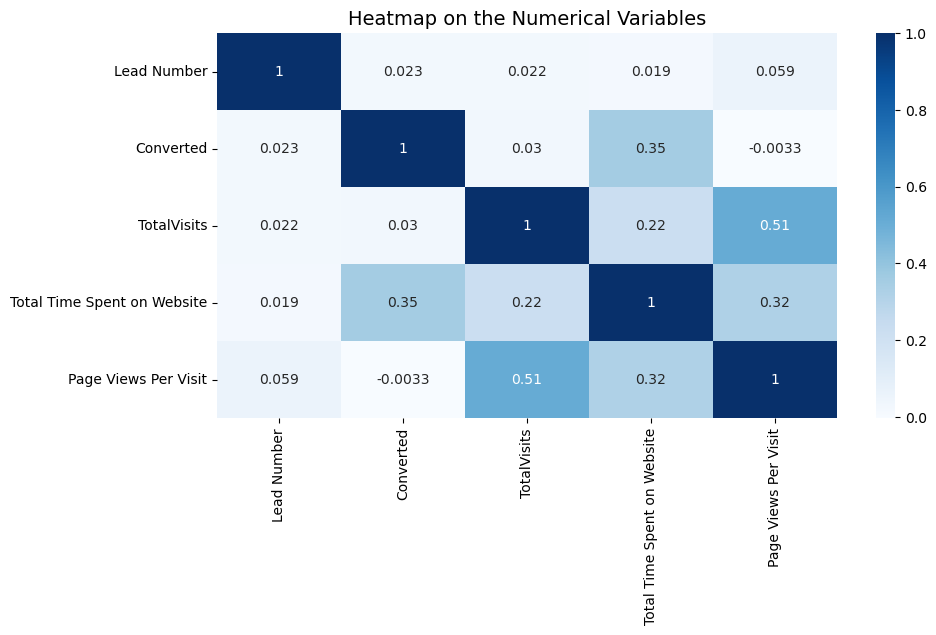

In [60]:
#plot heatmap on numerical variables
plt.figure(figsize=(10,5))
sns.heatmap(Lead.corr(), cmap="Blues", annot=True)
plt.title("Heatmap on the Numerical Variables",fontsize=14)
plt.show()

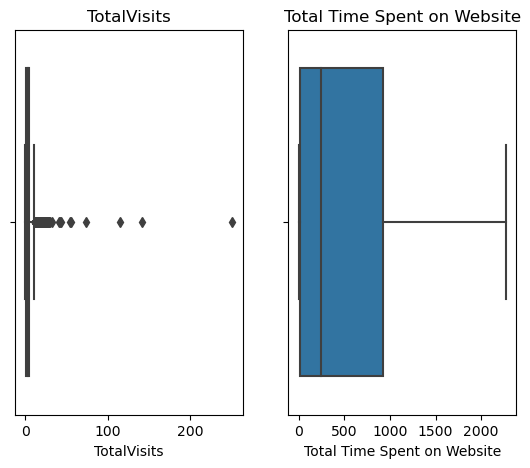

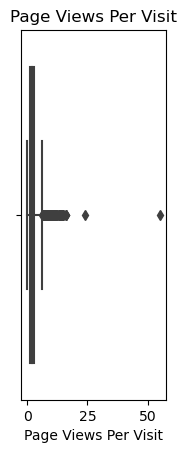

In [61]:
plt.figure(figsize=(10,5))

ax1=plt.subplot(1, 3, 1)
ax1=sns.boxplot(x=Lead['TotalVisits'], hue=Lead['Converted'])
plt.title("TotalVisits")

ax2=plt.subplot(1, 3, 2)
ax2=sns.boxplot(x=Lead['Total Time Spent on Website'], hue=Lead['Converted'])
plt.title("Total Time Spent on Website")
plt.show()

ax3=plt.subplot(1, 3, 3)
ax3=sns.boxplot(x=Lead['Page Views Per Visit'], hue=Lead['Converted'])
plt.title('Page Views Per Visit')
plt.show()

<Axes: xlabel='TotalVisits'>

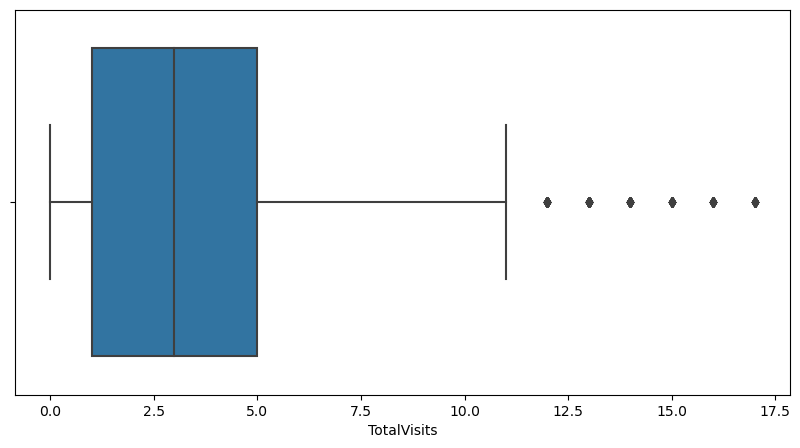

In [62]:
#Removing Outliers in TotalVisits
plt.figure(figsize = (10,5))
Q3 = Lead['TotalVisits'].quantile(0.99)
Q1 = Lead['TotalVisits'].quantile(0.01)

Lead = Lead[(Lead['TotalVisits'] <= Q3)]
Lead = Lead[(Lead['TotalVisits'] >= Q1)]
sns.boxplot( x= 'TotalVisits', data = Lead)

<Axes: xlabel='Page Views Per Visit'>

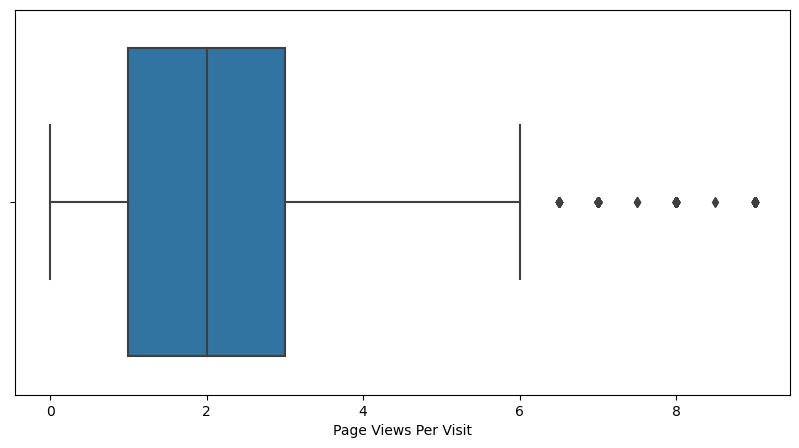

In [63]:
#Removing Outliers in Total Time Spent on Website
plt.figure(figsize = (10,5))
Q6 = Lead['Page Views Per Visit'].quantile(0.99)
Q4 = Lead['Page Views Per Visit'].quantile(0.01)

Lead = Lead[(Lead['Page Views Per Visit'] <= Q6)]
Lead = Lead[(Lead['Page Views Per Visit'] >= Q4)]
sns.boxplot( x= 'Page Views Per Visit', data = Lead)

In [64]:
categ_col = Lead.select_dtypes(include = 'object').columns.tolist()
Numer_col = Lead.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print(categ_col)
print('-'*30)
print(Numer_col)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']
------------------------------
['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [65]:
#Let's drop Prospect ID  and Lead Number
Lead.drop((['Lead Number','Prospect ID']) , axis=1, inplace = True)
Lead.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [66]:
categ_col = Lead.select_dtypes(include = 'object').columns.tolist()
Numer_col = Lead.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print(categ_col)
print('-'*30)
print(Numer_col)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']
------------------------------
['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [67]:
for i in categ_col:
    print(i)
    print(Lead[i].value_counts())
    print('-'*30)

Lead Origin
Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64
------------------------------
Lead Source
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                49
Social Media          33
Name: Lead Source, dtype: int64
------------------------------
Last Activity
Email Opened                    3390
SMS Sent                        2700
Olark Chat Conversation          966
Page Visited on Website          594
Converted to Lead                428
Email Bounced                    310
Email Link Clicked               264
Form Submitted on Website        114
Unreachable                       88
Unsubscribed                      60
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       4
Em

In [68]:
#A free copy of Mastering The Interview has yes and no 
#assign Yes to 1 and no to 0

def assign(x):
    return x.map({'Yes':1, 'No': 0})

Lead['A free copy of Mastering The Interview'] = Lead[['A free copy of Mastering The Interview']].apply(assign)
Lead['A free copy of Mastering The Interview'].value_counts()

0    6155
1    2798
Name: A free copy of Mastering The Interview, dtype: int64

In [69]:
#for Model preparation creating dummy variables for categorical columns
dummy = pd.get_dummies(Lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City','Last Notable Activity']], drop_first = True)

Lead = pd.concat([Lead, dummy], axis = 1)
Lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Others,...,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,...,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Other,Will revert after reading the email,...,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,...,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,...,0,0,0,0,0,1,0,0,0,0


In [70]:
Lead.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Co

In [71]:
Lead.drop((['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City','Last Notable Activity']), axis = 1, inplace = True)
Lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [72]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 55 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   A free copy of Mastering The Interview                8953 non-null   int64  
 5   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 6   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 7   Lead Origin_Lead Import                               8953 non-null   uint8  
 8   Lead Source_Google                                    8953

In [73]:
# MODEL BUILDING
from sklearn.model_selection import train_test_split

X = Lead.drop('Converted', axis = 1)
y = Lead['Converted'] # Target Variable

In [74]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [76]:
# Splitting into train and test data at 70/30 Ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [77]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,5.0,1490,5.00,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4696,3.0,457,3.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3274,4.0,126,2.00,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2164,2.0,393,2.00,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1667,4.0,1167,1.33,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [78]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,5.0,311,2.5,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
984,3.0,183,3.0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8135,2.0,913,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6915,4.0,141,2.0,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2712,3.0,252,3.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [79]:
y_train.head()

9196    1
4696    0
3274    0
2164    0
1667    1
Name: Converted, dtype: int64

In [80]:
y_test.head()

7681    0
984     0
8135    0
6915    0
2712    1
Name: Converted, dtype: int64

In [81]:
X_train.shape

(6267, 54)

In [82]:
y_train.shape

(6267,)

In [83]:
X_test.shape

(2686, 54)

In [84]:
y_test.shape

(2686,)

In [85]:
#Importing Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Selecting numerical cols for scaling 

numerical_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.668862,1.848117,1.455819,-0.667339,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4696,-0.030697,-0.037832,0.399961,-0.667339,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3274,0.319082,-0.642138,-0.127967,-0.667339,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2164,-0.380477,-0.154676,-0.127967,-0.667339,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,-0.667339,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [86]:
# Importing Statsmodels
import statsmodels.api as sm

In [87]:
from sklearn.linear_model import LogisticRegression

#Creating an instance of Logistic Regression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
 # running RFE with 15 variables 
rfe = RFE(logreg, n_features_to_select=15)    
rfe = rfe.fit(X_train, y_train)

In [88]:
# Combining the data to understand the full RFE data
Combined_Lead = zip(X_train.columns, rfe.support_, rfe.ranking_)
Combined_Lead = list(Combined_Lead)
Combined_Lead

[('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('A free copy of Mastering The Interview', False, 31),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', False, 6),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Social Media', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 28),
 ('Last Activity_Email Marked Spam', False, 40),
 ('Last Activity_Email Opened', False, 9),
 ('Last Activity_Email Received', False, 39),
 ('Last Activity_Form Submitted on Website', False, 37),
 ('Last Activity_Had a Phone Conversation', 

In [89]:
# checking the rfe Supported columns
rfe_support_col = X_train.columns[rfe.support_]
rfe_support_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Unsubscribed', 'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [90]:
#Model building

X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1685.5
Date:                Tue, 23 Jan 2024   Deviance:                       3371.1
Time:                        05:54:08   Pearson chi2:                 7.11e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5465
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8839      0.071    -26.485      0.000      -2.023      -1.744
Total Time Spent on Website                              1.0929      0.051     21.608      0.000       0.994       1.192
Lead Origin_Lead Add Form                                3.2441      0.931      3.484      0.000       1.419       5.069
Lead Source_Olark Chat                                   1.3512      0.128     10.585      0.000       1.101       1.601
Lead Source_Reference                                    1.0643      0.971      1.096      0.273      -0.838       2.967
Lead Source_Welingak Website                             3.5794      1.374      2.605      0.009       0.887       6.272
Last Activity_Converted to Lead                         -1.2069      0.266     -4.537      0.000      -1.728      -0.685
Last Activity_Email Bounced                             -2.2755      0.430     -5.295      0.000      -3.118      -1.433
Last Activity_Olark Chat Conversation                   -1.7008      0.198     -8.591      0.000      -2.089      -1.313
Last Activity_Unsubscribed                              -1.8829      0.751     -2.507      0.012      -3.355      -0.411
Specialization_Travel and Tourism                       -1.1560      0.383     -3.016      0.003      -1.907      -0.405
What is your current occupation_Working Professional     1.4341      0.271      5.300      0.000       0.904       1.964
Tags_Ringing                                            -3.4134      0.245    -13.954      0.000      -3.893      -2.934
Tags_Will revert after reading the email                 4.2651      0.179     23.880      0.000       3.915       4.615
Last Notable Activity_Others                             1.3827      0.453      3.052      0.002       0.495       2.271
Last Notable Activity_SMS Sent                           1.9106      0.110     17.342      0.000       1.695       2.127
========================================================================================================================
"""

In [91]:
#dropping column with high p-value

rfe_support_col = rfe_support_col.drop('Lead Source_Reference',1)

In [92]:
#Model 2 after removing the Lead Source_Reference

X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1686.1
Date:                Tue, 23 Jan 2024   Deviance:                       3372.2
Time:                        05:54:08   Pearson chi2:                 7.08e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5464
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8829      0.071    -26.478      0.000      -2.022      -1.744
Total Time Spent on Website                              1.0926      0.051     21.603      0.000       0.994       1.192
Lead Origin_Lead Add Form                                4.2280      0.291     14.544      0.000       3.658       4.798
Lead Source_Olark Chat                                   1.3497      0.128     10.569      0.000       1.099       1.600
Lead Source_Welingak Website                             2.5947      1.050      2.471      0.013       0.537       4.653
Last Activity_Converted to Lead                         -1.2076      0.266     -4.540      0.000      -1.729      -0.686
Last Activity_Email Bounced                             -2.2747      0.430     -5.296      0.000      -3.117      -1.433
Last Activity_Olark Chat Conversation                   -1.7004      0.198     -8.590      0.000      -2.088      -1.312
Last Activity_Unsubscribed                              -1.8829      0.752     -2.505      0.012      -3.356      -0.409
Specialization_Travel and Tourism                       -1.1560      0.383     -3.017      0.003      -1.907      -0.405
What is your current occupation_Working Professional     1.4430      0.270      5.348      0.000       0.914       1.972
Tags_Ringing                                            -3.4177      0.245    -13.973      0.000      -3.897      -2.938
Tags_Will revert after reading the email                 4.2632      0.179     23.870      0.000       3.913       4.613
Last Notable Activity_Others                             1.3794      0.453      3.046      0.002       0.492       2.267
Last Notable Activity_SMS Sent                           1.9089      0.110     17.325      0.000       1.693       2.125
========================================================================================================================
"""

In [93]:
#Importing VIF from Stasmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,1.71
1,Lead Origin_Lead Add Form,1.64
2,Lead Source_Olark Chat,1.60
13,Last Notable Activity_SMS Sent,1.44
12,Last Notable Activity_Others,1.40
0,Total Time Spent on Website,1.37
6,Last Activity_Olark Chat Conversation,1.35
3,Lead Source_Welingak Website,1.34
7,Last Activity_Unsubscribed,1.28
9,What is your current occupation_Working Profes...,1.28


In [95]:
# Predicting the 10 values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.202227
4696    0.031277
3274    0.337233
2164    0.022925
1667    0.977141
7024    0.184488
8018    0.039673
778     0.069492
6942    0.039673
4440    0.095744
dtype: float64

In [96]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20222682, 0.03127712, 0.3372334 , 0.02292549, 0.97714127,
       0.18448773, 0.03967253, 0.06949161, 0.03967253, 0.09574438])

In [97]:
#Converting the predicted variable into a dataframe

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

#Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.202227,9196
1,0,0.031277,4696
2,0,0.337233,3274
3,0,0.022925,2164
4,1,0.977141,1667


In [98]:
# Predicting the output and to see how the model performs

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.202227,9196,0
1,0,0.031277,4696,0
2,0,0.337233,3274,0
3,0,0.022925,2164,0
4,1,0.977141,1667,1


In [99]:
# Now we can check how the model performs using the Confusion Matrix

# Importing metrics from SKlearn

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_matrix)

[[3673  209]
 [ 453 1932]]


In [100]:
# Printing the overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8943673208871868


In [101]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [102]:
print ("True positive is ",TP)
print ("True negatives is ",TN)
print ("False positives is ",FP)
print ("False negatives is ",FN)

True positive is  1932
True negatives is  3673
False positives is  209
False negatives is  453


In [103]:
# Sensitivity
Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity is ',Sensitivity,'%')

Sensitivity is  81.01 %


In [104]:
# Specificity
Specificity = round(TN / float(TN+FP)*100,2)
print('Specificity is ',Specificity,'%')

Specificity is  94.62 %


In [105]:
# positive predictive value 
print (TP / float(TP+FP))

0.9023820644558618


In [106]:
# Negative predictive value
print (TN / float(TN+ FN))

0.890208434318953


In [107]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

<Figure size 1500x1500 with 0 Axes>

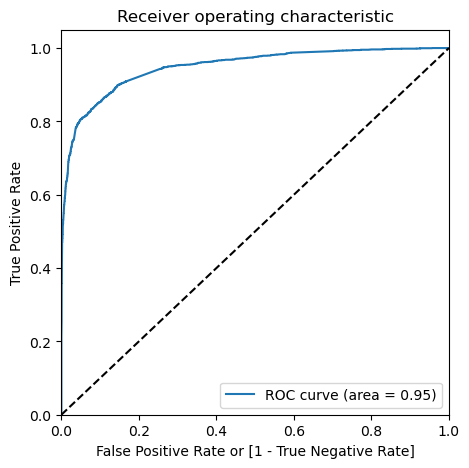

In [109]:
plt.figure(figsize=(15,15))
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.show()

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.202227,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031277,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.337233,3274,0,1,1,1,1,0,0,0,0,0,0
3,0,0.022925,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.977141,1667,1,1,1,1,1,1,1,1,1,1,1


In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.766715  0.958071  0.649150
0.2   0.2  0.864848  0.905241  0.840031
0.3   0.3  0.875539  0.876730  0.874807
0.4   0.4  0.885751  0.842348  0.912416
0.5   0.5  0.894367  0.810063  0.946162
0.6   0.6  0.894208  0.781551  0.963421
0.7   0.7  0.878251  0.719497  0.975786
0.8   0.8  0.870113  0.687212  0.982483
0.9   0.9  0.840753  0.596646  0.990726


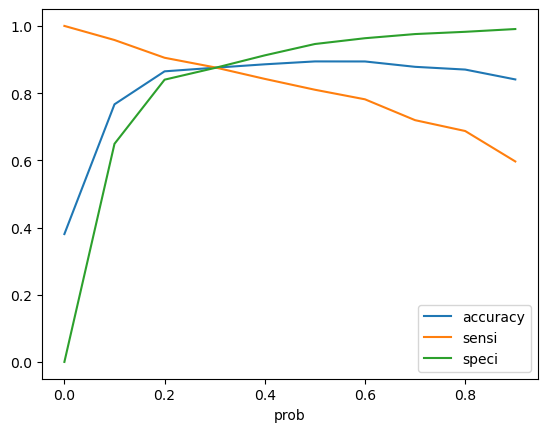

In [112]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [113]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.202227,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031277,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.337233,3274,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.022925,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.977141,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [114]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.202227,9196,0,20
1,0,0.031277,4696,0,3
2,0,0.337233,3274,1,34
3,0,0.022925,2164,0,2
4,1,0.977141,1667,1,98


In [115]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8755385351842987

In [116]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3396,  486],
       [ 294, 2091]], dtype=int64)

In [117]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.810062893081761

In [118]:
# Let us calculate specificity
TN / float(TN+FP)

0.9461617722823287

In [119]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.05383822771767131


In [120]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9023820644558618


In [121]:
# Negative predictive value
print (TN / float(TN+ FN))

0.890208434318953


In [122]:
# Precision
TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8114086146682189

In [123]:
# Recall
TP / TP + FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8767295597484277

In [124]:
from sklearn.metrics import precision_score, recall_score

In [125]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8114086146682189

In [126]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8767295597484277

In [127]:
from sklearn.metrics import precision_recall_curve

In [128]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

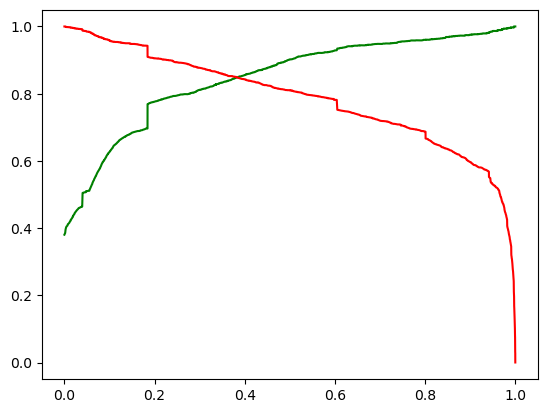

In [129]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [130]:
#scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.575687,-0.311318,0.092860,1.448461,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
984,-0.090676,-0.550262,0.356568,1.448461,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8135,-0.423857,0.812462,-0.170849,1.448461,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6915,0.242505,-0.628665,-0.170849,1.448461,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2712,-0.090676,-0.421456,0.356568,-0.690388,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [131]:
X_test = X_test[rfe_support_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Unsubscribed,Specialization_Travel and Tourism,What is your current occupation_Working Professional,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Others,Last Notable Activity_SMS Sent
7681,-0.311318,0,0,0,0,0,0,0,0,0,1,0,0,1
984,-0.550262,0,0,0,0,0,0,0,0,0,0,0,0,0
8135,0.812462,0,0,0,0,0,0,0,0,0,0,0,0,1
6915,-0.628665,0,0,0,0,0,0,0,0,0,1,0,0,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,1,0,0


In [132]:
X_test_sm = sm.add_constant(X_test)

In [133]:
y_test_pred = res.predict(X_test_sm)

In [134]:
y_test_pred[:10]

7681    0.023387
984     0.076976
8135    0.713757
6915    0.002503
2712    0.872117
244     0.006283
4698    0.059551
8287    0.038861
6791    0.957009
8970    0.032040
dtype: float64

In [135]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [136]:
# Let's see the head
y_pred_1.head()

,0
7681,0.023387
984,0.076976
8135,0.713757
6915,0.002503
2712,0.872117


In [137]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [138]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [139]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [140]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [141]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.023387
1,0,984,0.076976
2,0,8135,0.713757
3,0,6915,0.002503
4,1,2712,0.872117


In [142]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [143]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.023387
1,0,984,0.076976
2,0,8135,0.713757
3,0,6915,0.002503
4,1,2712,0.872117


In [144]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [145]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.023387,2
1,984,0,0.076976,8
2,8135,0,0.713757,71
3,6915,0,0.002503,0
4,2712,1,0.872117,87


In [146]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [147]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.023387,2,0
1,984,0,0.076976,8,0
2,8135,0,0.713757,71,1
3,6915,0,0.002503,0,0
4,2712,1,0.872117,87,1


In [148]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8689501116902457

In [149]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1463,  213],
       [ 139,  871]], dtype=int64)

In [150]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.810062893081761

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.9461617722823287

In [152]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8035055350553506

In [153]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8623762376237624

In [154]:
# OBSEVATIONS
TRAIN SET:

ACCURACY - 87.55%
SENSITIVITY - 81.00%
SPECIFICITY - 94.61%

PRECISION - 81.14%
RECALL - 87.67%


TEST SET:

ACCURACY - 86.89%
SENSITIVITY - 81.00%
SPECIFICITY - 94.61%

PRECISION -  90.35%
RECALL -   86.23%


SyntaxError: invalid syntax (1943962838.py, line 2)